<h1>~~~ Convolutional Neural Networks ~~~</h1>

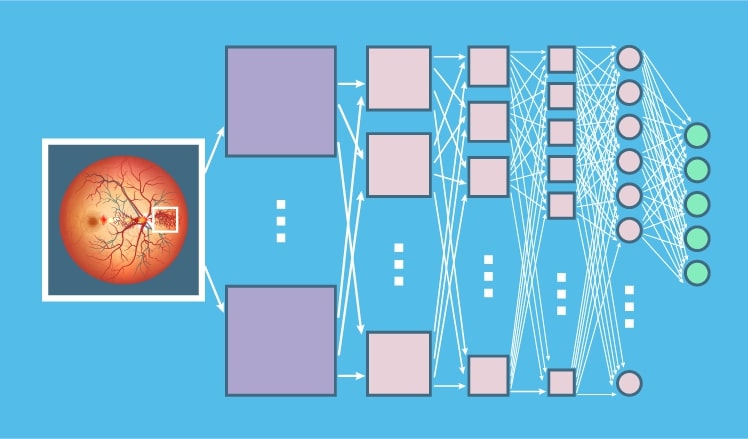

<div style="background-color: #de8d2a; color: white; padding: 10px; border-radius: 5px;">

<h2>Table of Contents: </h2>

1. Recap of notebook 1 (Machine Learning + Neural Networks)    

2. Convolutional Neural Networks   
    a. General CNN structure  
    b. Convolution  
    c. Non-linear activation functions  
    d. Pooling layers  
    e. Final note  

3. What is Medical Imaging?  

4. Case study: classification of different skin cancers    
    a. What is a classification task?  
    b. Dataset and dataloaders  
    c. Why and how are CNNs able to solve this kind of problem  
    d. Analysing performance: Confusion matrix     

5. Case study: segmentation of brain tumours  
    a. What is a segmentation task?  
    b. Datasets and dataloaders  
    c. Why and how are CNNs able to solve this kind of problem  
    d. Analysing performance: Dice metrics  

<h3> <span style="color: #f28f2c;"> ~~~ Part 1. Recap of notebook 1 (Machine Learning + Neural Networks) ~~~ </span> </h2>

We have discussed a lot of topics so far in our previous two notebooks so let's just take a quick step back to see the big picture, what pieces of the puzzle we have filled in, and where we need to take off. "Monash AIM is a student team which aims to create imaging solutinos to help with the diagnosis and treatment of medical conditions". So far, we have learned about how we can use AI and machine learning concepts to achieve these outcomes and how these machine learning models can be customised/tuned to perform specific tasks. We have learned about: 
- the different types of learning (supervised, unsupervised, reinforcement), 
- regression vs classification models, 
- the general structure of a neural network: neurons, weights, and layers (including hidden layers), 
- why we need activation functions such as ReLU or sigmoid, 
- forward-pass of a sample into the model to generate a prediction, 
- optimization functions that compare the generated prediction to the expected class,   
- backpropagation to reflect on this optimization and update the weights of the neurons accordingly, and 
- the possible consequences of the methods used to train our models (underfitting vs overfitting). 

At the end of our previous notebook, we also briefly introduced the concept of Convolutional Neural Networks (CNNs) and more importantly, why CNNs are a much more suitable tool for Monash AIM’s focus on medical imaging analysis in comparison to multi-layer perceptron (MLP) models. In this notebook, we take the time to expand on the structure of CNN models and encourage you to appreciate how these models can be adopted in real-life applications to automate the analysis of medical images in a manner that is more cost-effective (requiring less trained professionals, equipment, time), and potentially more accurate than the human eye.

<h3> <span style="color: #f28f2c;"> ~~~ Part 2. Convolutional Neural Networks ~~~</span> </h3> 

<h4> <span style="color: #f28f2c;"> 2a. General CNN structure </span> </h4>

Just to re-emphasise the key advantages of CNNs once again, they allow us to:
  
- Use convolutional operations to learns features of an image in a hierarchical manner (from edges to eyes/ears/mouths to facial structures) whilst preserving the spatial information in an image, 
- Reduce computational loads during training, 
- Sensitively detect features in an accurate manner whilst remaining invariant to variations in the data being presented. 



<center>

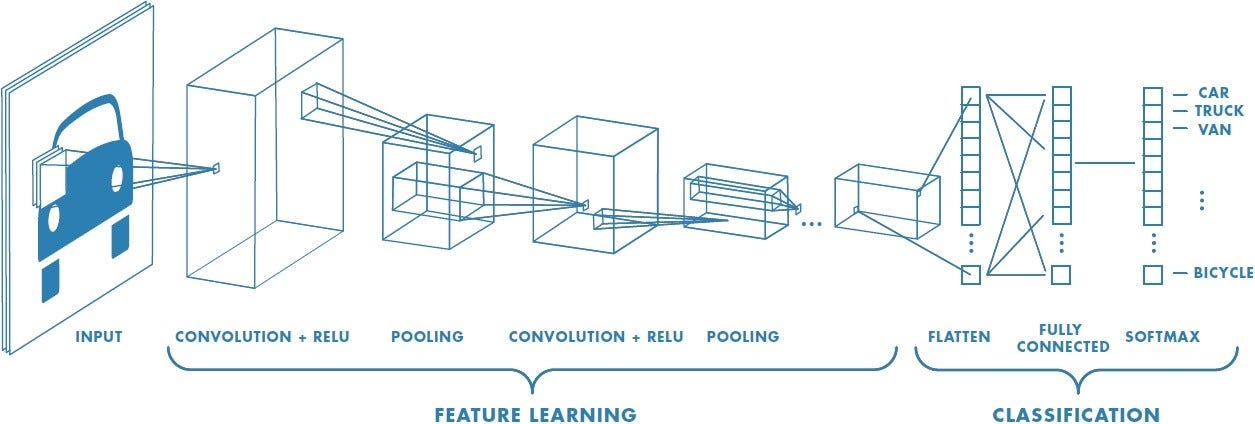

<i>Figure 1. General structure of a CNN</i>

</center>

Notice in figure 1 above that instead of individual neurons in the first convolutional layer being connected to each pixel in the input image (which is the case for an MLP), each neuron is responding to stimuli produced by a “patch” of pixels (also known as the <b>receptive field</b> of the neuron). In doing so, we reduce the number of neurons needed in each convolutional layer as well as capture the spatial and temporal dependencies of each pixel in an image by analysing not only the individual pixels themselves but also their interactions with surrounding pixels. 

Figure 2 below is a good visual representation of the convolution processes that occur to transition from the input image to the first convolutional feature in figure 1. Notice how the input image is a 5x5 matrix, however, the output is a smaller 3x3 matrix. This is a natural consequence of convolution and may pose a problem as we are essentially 'losing' information; however, we will discuss techniques that can address this later on. 

<center>

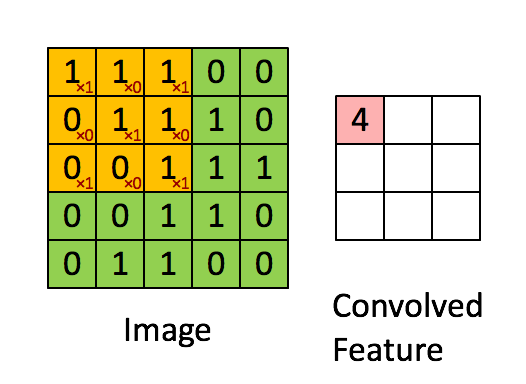

<i>Figure 2. Convolution of a filter over an image</i>

</center>

To demonstrate the correlation between figures 1 and 2: 
- The input image (car) in figure 1 is represented by the green matrix in figure 2. 
- We slide a filter (smaller yellow matrix) over the input image, multiplying the overlapping elements together and taking a sum to produce each of the pink elements in figure 2. 
- In figure 1, the filter is the smaller patch overlayed over the input image, and the pink elements are the smaller squares on the convolutional “block” that the filter in figure 1 is projecting to. 
- After we convolve the filter over the entire input image, we obtain the first convolved feature e.g., edges. 
- Notice in figure 1 that the first convolutional feature undergoes various operations (e.g., non-linear activation functions, and pooling (to be discussed later)) before it is convolved again with another filter to produce the second convolutional feature e.g., eyes, ears, noses. 


<b>To further emphasise the effectiveness of CNNs over MLPs: </b>imagine if our data was not represented by a black and white image (single-channel) but more commonly, a colour/RGB image where we need to consider not only the height and width of the image but also the 3 different colour channels. Referring back to the main three advantages of CNNs: 
- Performing pixel-based analysis on every single pixel (MLPs) will be extremely computationally intensive as opposed to analysing “patches” of the image at a time (CNNs). 
- The consequences of flattening these 3D matrices into a 1D matrix are detrimental as all notions of spatial and temporal relations between pixels are destroyed. This is much easier to visualise when handling colour images where we need to look at pixels across all three channels simultaneously instead of pixels at a single channel. 


As previously stated, each convolutional operation - from the input to the first convolved feature to the second convolved feature and so on - is designed to capture an increasing hierarchy of features (from edges to facial features to facial structures). 

<center>

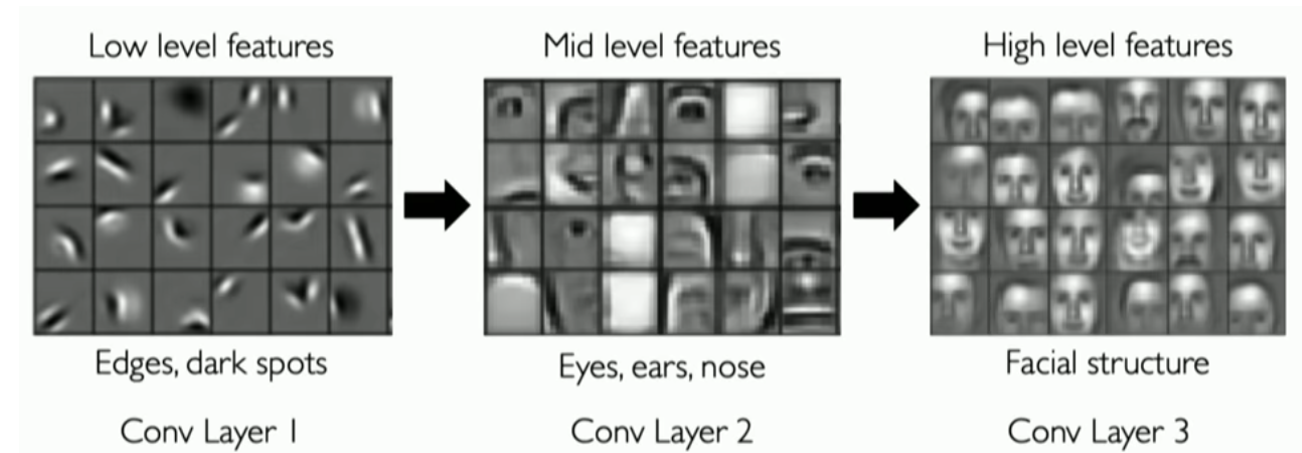

<i>Figure 3. Increasing complexity of features learned by a CNN at each convolutional layer. </i>

</center>

<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">

<b>Take the analogy of learning how to dance:</b> 

- During your very first rehearsal, you might just be trying to learn or recognise the individual moves. Naturally, you will have an easier time memorising simpler moves in comparison to moves that are harder to execute. 
- During your second rehearsal, this may be when you decide to polish up on the harder moves. 
- During your third rehearsal, you might be confident with the moves and instead, move on to something more complex like synchronising your choreography with the music. 
- And on your final rehearsal, you might move on to learning how to portray your own emotions/style with your choreography and the music from your previous rehearsals. 

Notice how humans naturally learn things in a hierarchical manner. Between each rehearsal, you may relook over a recording of the routine and compare it to your own memory of the routine, identifying where things should be different and how you can change them before the next rehearsal and ultimately, your chance on the stage. 


<br><br>
This is exactly what a neural network is doing and moreover, training is heavily dependent on the extent that we iterate through two processes:  

- <b>Forward pass:</b> feeding our input image through the different hidden layers to generate the predicted output.  

- <b>Backpropagation:</b> by comparing the predicted output to the theoretical output, we know which neurons/filters we need to attend to and change (update its weights/biases) before trying to forward pass again.

This process of “learning and refining” is repeated for a specified number of times <b>(epochs)</b> and ideally, the accuracy should improve as we train for more iterations. 


<div style="background-color: #c04ae0; color: white; padding: 10px; border-radius: 5px;">

<span style="color: yellow"><i>Now that we know the fundamentals required for training, how can we personalise our training according to our task? </i></span>

To summarise the structure of a CNN so far: 
1. We have an input image that undergoes convolutional operations to generate a convolutional feature.
2. This convolutional feature continues to undergo further convolutional operations until a final convolutional feature map is generated. 
3. We then flatten this feature map and pass it through as a fully-connected layer for classification and comparison against the expected output. 

This model appears relatively consistent throughout different tasks, however, there are still parameters and features that need to be strategically applied/adjusted in order to improve the performance and accuracy of the model. Referring back to figure 1, our convolutional hidden layers are comprised of three main components that we will address individually: 

1. Convolution
2. ReLU (or other non-linear activation functions)
3. Pooling layers

<h4> <span style="color: #f28f2c;"> 2b. Convolution </span> </h4>

When tuning the convolutional blocks in our neural network, there are four main variables of interest: 

<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">

<b>Kernel size:</b> the size of the filter that we are sliding over the image.

- Smaller kernel size: analyses finer details (favours pixel-based analysis) however, increases computational need and time as we will have convolutional operations 
- Larger kernel size: analyses a larger area of pixels (spatial information and interactions between pixels) 

<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">


<b>Stride: </b> the number of pixels that we shift our convolutional filter before convolving, reducing the number of convolutional operations. 

- Stride = 1: shift our filter by one pixel to the right 
- Stride = 2: shift our filter by two pixels to the right. 

<center>

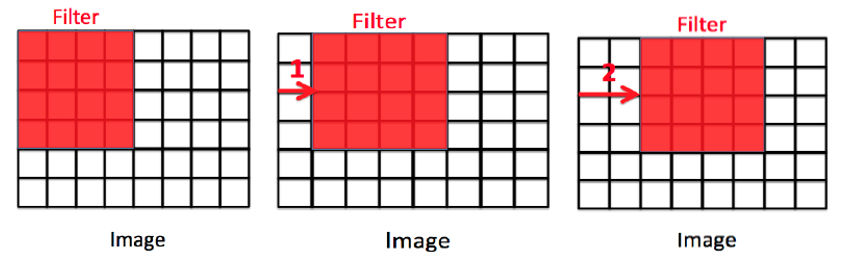

<i>Figure 4. Convolution of an image with different stride values </i>

</center>

<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">

<b>Padding: </b> surrounds the input image with zeroes, resolving two issues of typical convolution (where padding is absent): 

1. Each convolutional operation results in an output feature map with a smaller resolution 
    - Padding attempts to preserve the size of the original image. 
2. During convolution, the elements of the image that are on the edge are not convolved as frequently as the elements in the centre due to the lower number of overlaps. 
    - In fact, the four corners of an image are only used once each, and these may have very distinguishing features. 
    - Padding in this sense “pushes the edges towards the middle" in order for them to be more involved in the convolution operations. 


<center>

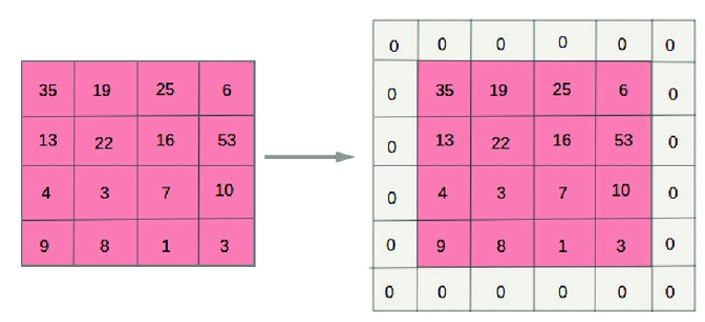

<i> Figure 5. Padding an input image with a degree of 1. </i>

</center>

<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">

<b>Dilation: </b>inflates the kernel matrix by inserting spaces between the kernel elements.  

- Increases the receptive field of the filter. Unlike padding where we are increasing the size of the input image, we are increasing the size of the filter by inserting zeros between the elements. 
- Covers more of the input image per convolutional operation. 
- Computationally efficient without any loss in output image resolution. 

<center>

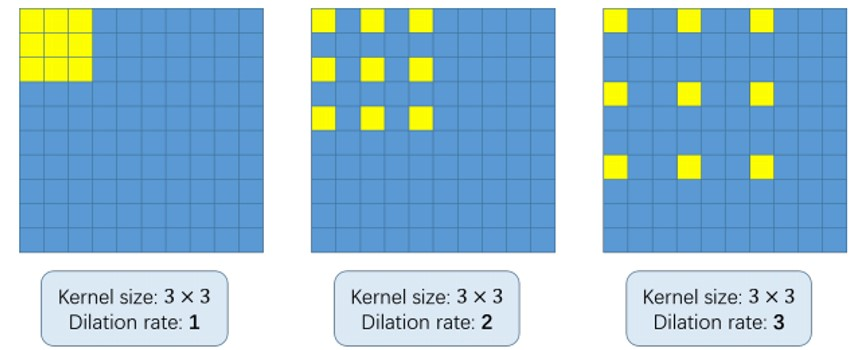

<i> Figure 6. Effect of increasing dilation rate on kernel size. </i> 

</center>

<h4> <span style="color: #f28f2c;"> 2c. Non-linear activation functions </span> </h4> 

We have previously discussed non-linear activation functions (such as ReLU, sigmoid, tanh, etc.,) in our first notebook. 

As a reminder to why we need non-linear activation functions, remember that we cannot simply stack linear combinations of hidden layers consecutively as these linear combinations can be simplified into an equivalent single linear transformation. In other words, regardless of how many linear hidden layers we stack, they will all be seen as a single operation instead of multiple. In the case of MLPs, we were dealing with matrix multiplication; however, the same principle applies for convolution. 

Two consecutive convolution operations ($g_1$ and $g_2$) being performed on a single input can be replaced with a single equivalent convolution operation such that: 
$$ f*g_1*g_2 = f * (g_1*g_2) = f * h$$

where $h = g_1*g_2$ 

<div style="background-color: #c04ae0; color: white; padding: 10px; border-radius: 5px;">

Similar to linear transformations, we apply non-linear activations functions in between the hidden layers to not only resolve this issue, but also incorporate the ability to develop more complex relationships and patterns (non-linearities) that would not be possible with simple linear functions. 

Remember that to choose an appropriate activation function for our task, we need to consider the advantages and disadvantages of each activation function and the values that are outputted when our convolved features are passed through them. 

Refer back to notebook 1 for more detail on the different types of non-linear activation functions and their advantages/disadvantages. 

<h4> <span style="color: #f28f2c;"> 2d. Pooling layers </span></h4>

Pooling layers are generally applied after the convolved feature passes through a non-linear activation function with the purpose of reducing the complexity and computational cost of the neural network. Sometimes we do not need to store all of the information of the convolved feature and if this is the case, one may choose to apply a pooling layer to retain only the important information in an image. Two common pooling techniques used in such CNNs are: 

<center>

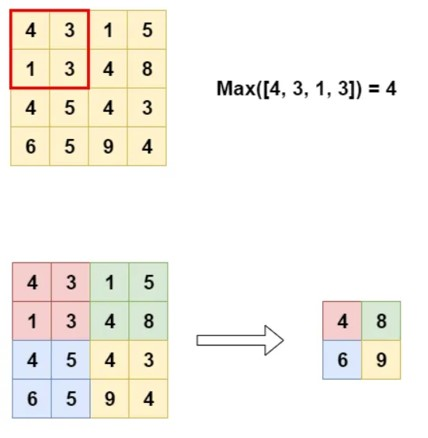

<b>Max pooling:</b> takes the maximum of a region specified by the filter size.  

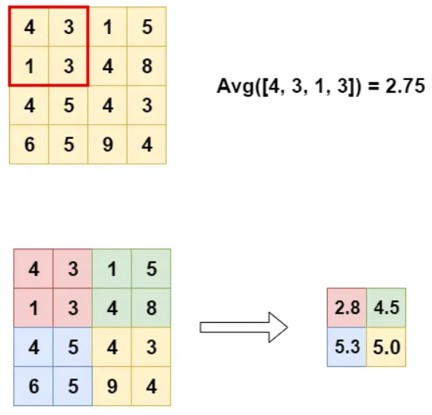

<b> Average pooling:</b> takes the average of a region specified by the filter size. 
</center>


Notice how average pooling still considers the contributions of values smaller than the maximum; whereas, values other than the maximum are discarded during max pooling. Ask yourself: 
- do I need values other than the maximum?
- is there any noise present in my data that will affect the result if i take the average? 
- maybe instead of the average or maximum, I can take the median? (more robust to outliers)

<h4> <span style="color: #f28f2c;"> 2e. Final note on CNNs </span> </h4>

Clearly, CNNs are much more advantageous than MLPs in handling medical imaging tasks as a result of their convolutional operations. Furthermore, we can tune different parameters and the features of our hidden layers to improve the overall performance threshold of our model. However, it doesn’t stop there! CNNs have continued to improve in the community by progressively adding new hidden layers or features that ultimately led to deeper neural network models that we know and use today: 
- <b>VGG-Net:</b> basis of ground-breaking object recognition models 
- <b>GoogleNet: </b>incorporated global-average-pooling (GAP) layers and auxiliary classifiers  
- <b>ResNet:</b> comprised of residual units that allow deep layers to directly learn from shallower layers 


<h3> <span style="color: #f28f2c;"> ~~~ Part 3. What is Medical Imaging? ~~~</span></h3>


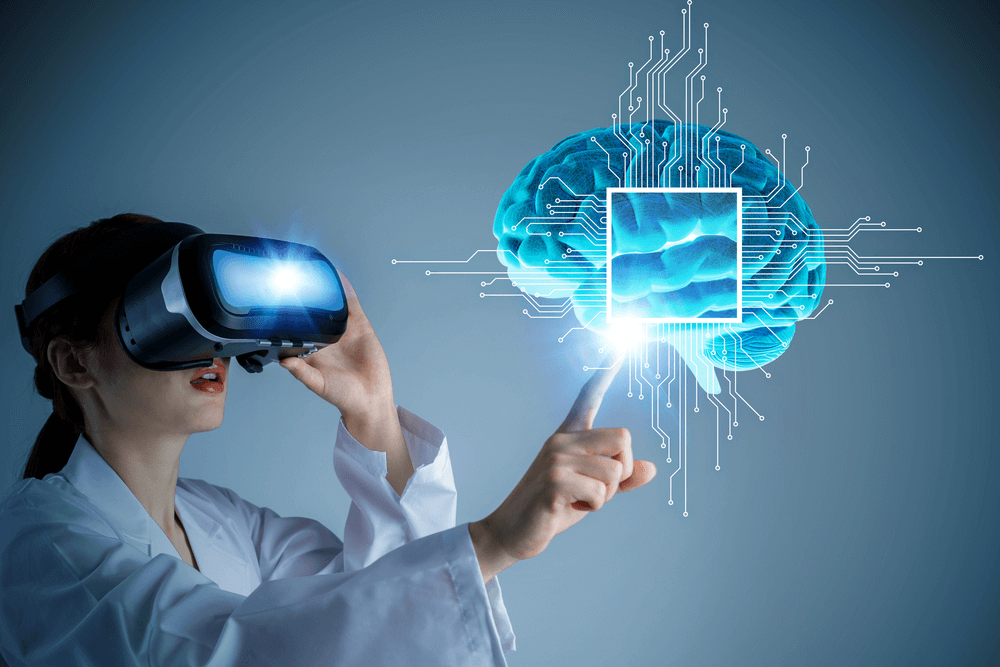

<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">


According to the US Food and Drug Administration (FDA), medical imaging refers to:
<center><i><span style="color: yellow;">"several different technologies that are used to view the human body in order to diagnose, monitor, or treat medical conditions”.</span></i></center>

Medical imaging procedures provide doctors with a means of diagnosing and treating diseases/injuries in their patients in a non-invasive and less costly manner. There are a vast number of medical imaging technologies available; however, different technologies will be more suited for different tasks due to the type  of information presented and how it is obtained. Some examples of when you would need to use medical imaging include: 
- Detecting obstructions to blood flow 
- Determining if a tumour needs to be treated/removed
- Determining if surgical procedures need to be performed e.g., joint replacements, stents, catheters. 


The table below summarises 5 different types of imaging techniques; however, we have also provided a separate Medical Imaging notebook that discusses each technique in greater detail for your own interest:  
| Imaging technique | Description | 
|-------------------|-------------|
| X-ray | uses ionizing radiation that passes through the body to capture images of bones, soft tissue, etc. |
| Computed Tomography (CT) | uses a combination of X-rays and computer processing to create cross-sectional images of the body that highlight the bones, blood vessels, and soft tissues. |
| Magnetic Resonance Imaging (MRI) | uses magnetic field and radio waves to generate high resolution 2D and 3D images of a patient’s body | 
| Positron Emission Tompgraphy (PET) | relies on capturing emissions from radioactive material (radiopharmaceuticals) that have been injected into patients to assess cancers, neurological and cardiovascular diseases. |
| Echocardiography | uses soundwaves to show how blood flows through the heart and heart valves |


We believe that through the development of AI-powered image processing and CNN models, the diagnosis of medical conditions can not only be automated, but also have the potential to be more efficient, precise, and inexpensive than traditional manual image analysis procedures. In the following sections, we will walk through how CNNs can be used to address two real-world medical contexts: 
1.	The classification of different skin cancers 
2.	The segmentation of brain tumours 

<h3><span style="color: #f28f2c;"> ~~~ Part 4. Case study: classification of different skin cancers ~~~ </span></h3>

<h4><span style="color: #f28f2c;"> 4a. What is a classification task? </span></h4>

If dermatologists suspect a patient to have skin cancer, they inspect the skin on the region of concern using a dermaoscope, which is like a magnifying glass to check what features the spots or dots on the skin have. If they find features that are indicative of cancerous skin, they will order a skin biopsy for the patient to further investigate and validate their deduction before diagnosing the patient with skin cancer [1].

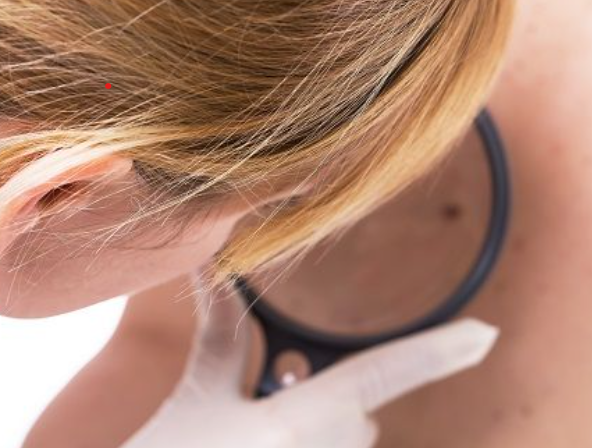

A classification neural network aims to perform the same task that the dermatologist is performing: to analyse features from scans of potentially cancerous regions of skin and deduce from this analysis whether the patient is healthy or ill. In Layman's terms, you are making the model predict what image you have fed into it. Is it a car, truck, aeroplane, tank, etc. 


If the model is trained to be accurate enough, it may even be adopted as a suggestion tool for such health professionals. Characteristic features of skin cancers depicted in the image below can be used as categories for the classification model to choose from, and variations or combinations of images with these types of image features can be used to train the neural network model and predict skin cancer conditions when fed with actual patient data.

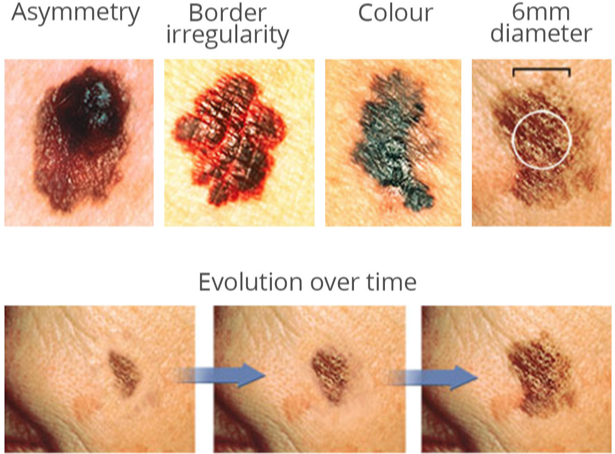


<h4><span style="color: #f28f2c;"> 4b. Datasets and DataLoaders </span></h4>

<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">

In section 3.1a of our previous notebook on machine learning, we introduced the concept of <b>datasets: a collection of data that is used for training, evaluating, and testing a machine learning model. </b>

In the context of medical imaging, the dataset is essentially the medical images that we are feeding into our neural networks. As we are currently addressing the classification of different skin cancers, we will be analysing the <b>MNIST: HAM10000 dataset</b> [2] which is commonly used to train neural networks in an attempt to automate the diagnosis of pigmented skin lesions from multi-source dermatoscopic images. 

When handling this specific dataset, we will notice that there are 10000 images that can be downloaded, as well as a CSV file that provides a neat summary of each image's details: 
- lesion_id: some of the images are actually from the same lesion; these images can be grouped by their lesion_id
- image_id: the downloaded file name (jpg files) 
- dx: the diagnosis (refer to the website for more information on what each acronym stands for))
- dx_type: the type of diagnosis e.g., histopathology, follow-up examination, consensus, etc.
- age
- sex
- localisation

The code and output below (shown in figure 7) extracts and displays the format of this CSV file, showing 7 columns (labels); however, we are mainly interested in the image_id and dx columns which correspond to the image file and type of skin cancer diagnosed for our classification task. 

In [1]:
import torch
import torch_directml
import torch.nn as nn 
import torch.nn.functional as F 
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from PIL import Image

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
## Processing the csv file 
folder_path = 'F:/Skin lesions classification/'
skin_cancer_csv = pd.read_csv(folder_path + 'HAM10000_metadata.csv')

## Printing the csv file structure
skin_cancer_csv

lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

<i style = 'color: red; font-size: 13pt'>Figure 7. Format of Skin Cancer MNIST:10000 dataset.
</i>

Generally, our dataset is divided into three main groups: 
- **Training data:** the sample of data used to train/fit the model; determining the weights and biases of the neurons 
- **Validation data:** the sample of data used to evaluate a given model while tuning the model’s hyperparameters. The model occasionally sees this data but never does it learn from it. 
- **Test data:** once the model is completely trained using the training and validation data sets, we provide the model with the final batch of images to evaluate its performance. 

**Example:** during many Kaggle competitions where participants are provided with datasets to train neural network models to perform the competition objectives, the training and validation datasets are provided initially for competitors to develop their neural networks; however, the actual test dataset is only provided when the competition is about to close to decide the winner. 

A common split for training and testing data is usually 80:20, the remaining training data being further divided into training and validation portions according to the developer's preferences. 


<center>

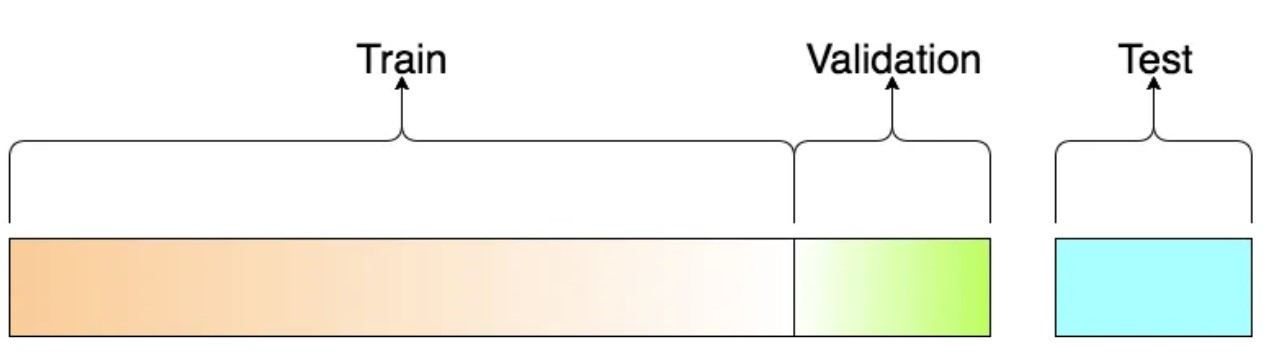

<i>Figure 8. Splitting the dataset into training, validation, and test sets. [3]</i>

</center>

Now that we have our training, validation, and testing data splits, we can feed each into our neural network one after another. Before we do this though, PyTorch provides us with essentially a class model that allows us to improve the simplicity and efficiency of training called a <b>DataLoader</b>. 

One approach when training a neural network may be to feed each individual image of the training dataset; however, this may not always be ideal when handling very large datasets. Remember that our Skin Cancer MNIST:HAM10000 dataset contains 10000 images. 

Instead, we can utilize the DataLoader class on our dataset to <b>train batches of several sample images</b> (similar concept to how we use convolution to analyse multiple pixels at once instead of individual pixels). Similar to convolution, this not only improves the efficiency and speed of training, but the quality of training becomes more generalized as multiple images are being analysed at once. 

Factors to take into consideration when designing DataLoaders include: 
- **Batch size:** the number of sample images in each batch 
- **Shuffling:** shuffles the entire dataset to ensure the batches are not the same across training cycles/epochs
- **Data augmentation:** manually introduces more variance to the data to improve robustness e.g., rotation, reflection, zoom/cropping, etc. 

The snippet of code below walks through the stages discussed in this section: 


In [16]:
# For this example, we have only downloaded half of the dataset (5000 images). Hence, we will only create our custom dataset from these 
# (assigning the labels from the CSV file to the image files)
# for ease, we will sort the CSV into ascending order based on the image_id
sorted_df = skin_cancer_csv.sort_values(by=['image_id'])

## Creating our custom dataset using the PyTorch Dataset reference class. Essentially, we are linking the actual images to their associated labels instead of the CSV. 
class CustomDataset(Dataset): 
    def __init__(self, root_dir, transform=None): 
        self.root_dir = root_dir
        self.transform = transform
        self.file_list = []

        # as all of our data is in the one MNIST HAM10000 folder, we can simply append the image files to file_list
        # isolate the filenames and labels from the CSV file 
        file_names = sorted_df.iloc[0:5000, 1]
        classes = sorted_df.iloc[0:5000, 2]

        for sample in range(5000):
            sample_file = file_names.iloc[sample] + '.jpg'
            sample_class = classes.iloc[sample]
            self.file_list.append((os.path.join(root_dir, sample_file), sample_class)) 

    
    def __len__(self): 
        return len(self.file_list)
    
    def __getitem__(self, idx): 
        image_path, class_name = self.file_list[idx]
        image = Image.open(image_path)

        if image.mode == 'L': 
            image = image.convert('RGB')
        
        if self.transform: 
            image = self.transform(image)
        return image, class_name



# Transformation to apply to the images
transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),     
])
    

In [17]:
# Create the training, validation, and testing datasets 
train_data = CustomDataset(root_dir='F:/Skin lesions classification/MNIST HAM10000/', transform=transform)

len_train_data = int(0.8 * len(train_data))
len_val_data = len(train_data) - len_train_data

train_data, val_data = random_split(train_data, [len_train_data, len_val_data])

# Shuffle relevant datasets and use the torch dataloader
batch_size = 24

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)

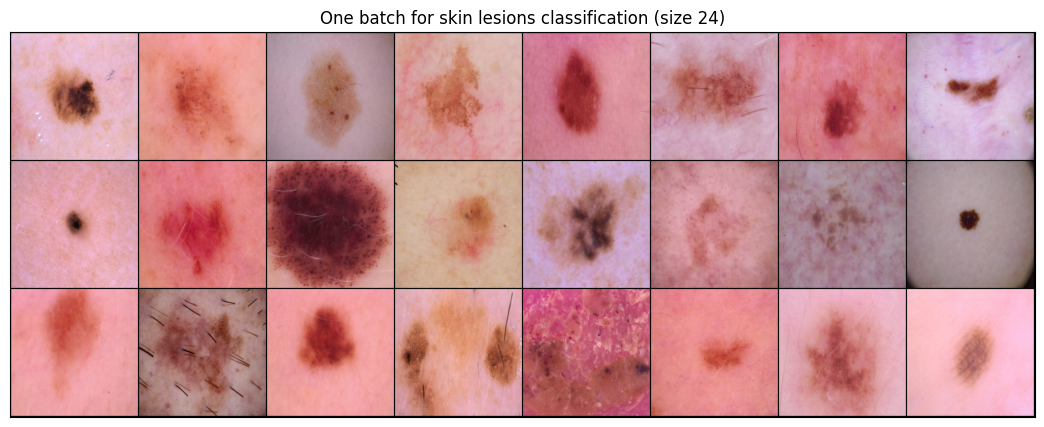

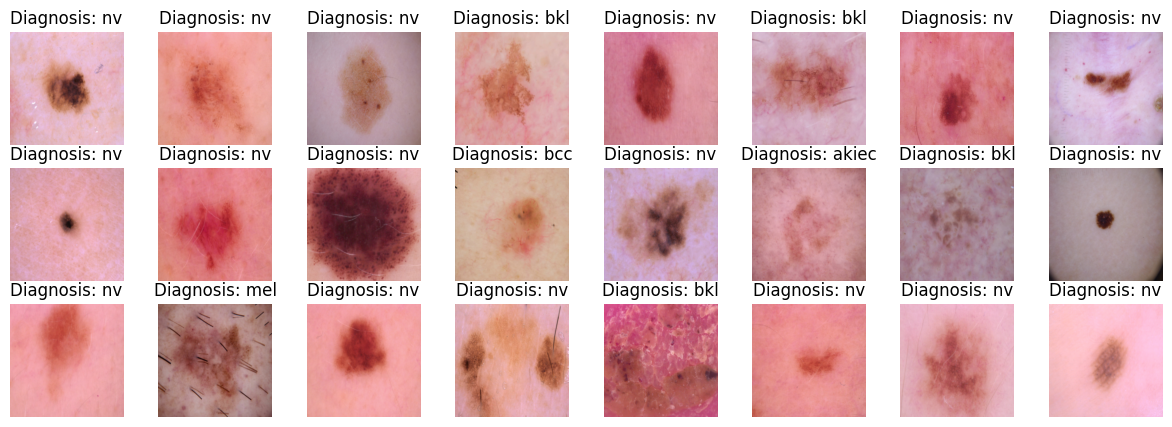

In [19]:
# Print a single instance of the dataloader and visualise  
images, labels = next(iter(train_loader))

fig1 = plt.figure(figsize=(15,5))
clean_grid = make_grid(images, normalize=True)

plt.imshow(clean_grid.numpy().transpose(1,2,0))
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.tick_params(axis='y', left=False, labelleft=False)
plt.title(f'One batch for skin lesions classification (size {batch_size})')



""" For visualisation purposes, let's see which labels are linked with each of the images 
    - akiec 
    - bcc
    - bkl
    - df
    - mel
    - nv
    - vasc
"""

fig2, axs = plt.subplots(3, 8, figsize=(15,5))

for i in range(batch_size): 
    image = images[i]
    image = (image.numpy().transpose(1,2,0))    # height x channels x width 
    row = i//8; 
    column = i%8; 
    axs[row, column].imshow(image)
    axs[row, column].set_title(f'Diagnosis: {labels[i]}')
    axs[row, column].axis('off')


<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">

Summary of this section: 
- Source the dataset that will be used for your CNN model. 
    - How many images are in the dataset? What are the dimensions of each image? 
    - How many labels (i.e., different skin cancers) have been classified? 
    - How has my data been presented? e.g., 
        - CSV file 
        - images grouped into folders named after the labels 
- Split your dataset into training, validation, and testing subsets 
- Wrap your datasets with a DataLoader to access batch-training for more efficient and robust training 


<h4><span style="color: #f28f2c;"> 4c. Why and how are CNNS able to solve this kind of problem?  </span></h4>

Recall that our main goal with CNNs is to learn features of an image in a hierarchical manner e.g., from edges to eyes/nose/mouth to facial expressions. Hence, CNNs can be used in our skin cancer classification problem to learn and recognise features that are associated with skin lesions to deduce whether a patient is diagnosed with a specific skin cancer condition. Once we have split our MNIST:HAM10000 dataset into training, validation, and testing subsets, we can wrap each subset with a DataLoader to create batches that will be fed into our model. 

As each batch is passed through the progressive convolutional layers, the model is generating weights and biases for each neuron before making a prediction i.e., if the patient is healthy or diagnosed with a specific skin cancer. 

Fantastic, our model has made a prediction; however, how does it actually learn? It needs to compare its predicted output to the theoretical output; only then can it reflect on its mistakes and improve its accuracy by 'backpropagating' to update its weights and biases accordingly before forward-passing again with the model's newly updated weights and biases. As the number of training cycles increase, we expect the model to progressively learn more complex, refined, and unique features that are closely associated with specific skin lesions, improving its ability to accurately diagnose numerous patients. (Think back to the dancing analogy if it helped)

To summarise, skin cancer classification can be successfully performed by CNN models that are designed to:  
1. feed an image/batch through the individual convolutional layers of the model 
2. generate a prediction of the possible diagnosis 
3. compare the prediction to the actual diagnosis 
4. update the weights and biases of the neurons accordingly 
5. repeate forward-pass and backpropagation procedures for the specified number of training cycles to further refine the model's weights and biases

As the number of training cycles increase, the weight and biases of the neurons will be progressively refined and hopefully, the model will be able to make accurate predictions when we feed the testing dataset into the model. 


<h4><span style="color: #f28f2c;"> 4d. Analysing performance: confusion matrix </span></h4>

<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">

After we have ran our classification algorithm we have to ask "how accurate were we?" The most basic measurement of accuracy is measuring the amount of correct classifications against incorrect ones. This approach works but lacks detail that may be helpful in improving our classification algorithm. A better strategy is using a **confusion matrix** which gives extra detail on our accuracy. A confusion matrix splits our accuracy into four categories for binary classification problems:
- **True Positives** ($TP$): cases where we correctly diagnose a positive case (infected patient)
- **True Negatives** ($TN$): cases where we correctly diagnose a negative case (healthy patient)
- **False Negatives** ($FN$): cases where we incorrectly diagnose a negative case as positive (infected patient mistakened for healthy)
- **False Positives** ($FP$): cases where we incorrectly diagnose a positive case as negative (healthy patient mistakened for infected)

|          | Positive | Negative |
| -------- | -------- | -------- |
| Positive | $TP$     | $FP$     |
| Negative | $FN$     | $TN$     |

Using the following metrics, we are able to compute the following values: 


| Metric                    | Equation                     | Description                                        |
| ------------------------- | ---------------------------- | -------------------------------------------------- |
| Sensitivity               | $\frac {TP}{TP+FN}$          | measures how often the prediction is correct       |
| Specificity               | $\frac {TN}{TN+FP}$          | measures when it is actually negative              |
| Precision                 | $\frac {TP}{TP+FP}$          | measures when a positive value is correct          |
| Negative predictive value | $\frac {TN}{TN+FN}$          | measures negative prediction                       |
| Accuracy                  | $\frac {TP+TN}{TP+TN+FP+FN}$ | measures overall correctness                       |


For problems which aren't binary and have more cases, we can construct a larger table that represents each category in an $n\times n$ table. In this scenario, the <b>columns represent the true class</b>, while the <b>rows represent the predicted class</b>. When in this higher-dimensionality, we look at the true positive/negatives and false positive/negatives by analysing a single classifier. In this case: 
- the row of the class represents the false negatives
- the column of the class represents the false positives 
- and the rest of the categories represent true negatives. 

For example: we can depict the categories for the case where we are looking at Class B as:
|         | Class A | Class B | Class C | Class D |
| ------- | ------- | ------- | ------- | ------- |
| Class A | $TN$    | $FP$    | $TN$    | $TN$    |
| Class B | $FN$    | $TP$    | $FN$    | $FN$    |
| Class C | $TN$    | $FP$    | $TN$    | $TN$    |
| Class C | $TN$    | $FP$    | $TN$    | $TN$    |

Using a confusion matrix we are able to diagnose where our algorithm is failing in particular. They are additionally important in a medical context where we want to: 
- minimise false positives as to not incorrectly diagnose a disease when the patient is actually healthy
- minimise false negatives to ensure the patient is not mistakened for being healthy and instead, attended to

<h3><span style="color: #f28f2c;"> ~~~ Part 5. Case study: segmentation of brain tumours ~~~ </span> </h3>

<h4><span style="color: #f28f2c;"> 5a. What is a segmentation task? </span></h4>

Let’s take a step back to remember the reasons we train neural networks. In the context of image analysis, neural networks can be trained to perform: 
- **Image classification:** the model receives an input image and assigns a label to the entire image e.g., does this image show a car or a truck? 
    - i.e., “what” is the image showing? 
- **Object detection:** the next step after image classification where we not only label the image as a “car” but also localize and define the boundaries of the car with bounding boxes. 
    - i.e., “where” is this car in the image? 

Finally, we have image segmentation which addresses the flaws of both image classification and object detection. More specifically, object detection allows us to relatively determine the location of objects; however, what happens when we have objects in close proximity or worse, overlapping? Instead of dividing the image into foreground and background (as in object detection), we can use various techniques (e.g., colour, intensity, patterns) to group and label individual pixels into specific classes based on related activities. Ultimately, our goal is to create segmentation masks that outline the specific boundaries and shapes of each class located throughout the image. 

Before we discuss the different types of segmentation tasks, there are two loose terms that we need to be aware of that reflect on the specific categories that elements in the image may fall under: 
- **“Things”:** objects with characteristic shapes and defined instances (countable)
    - E.g., trees, people, cars
- **“Stuff”:** amorphously shaped and highly variable in size; not clearly defined or countable 
    - E.g., sky, water, beach
    - E.g., a blade of grass is treated the same as a field 

Knowing this, we will have an easier time distinguishing between the three different types of segmentation tasks depicted in the figure below: 

<center>

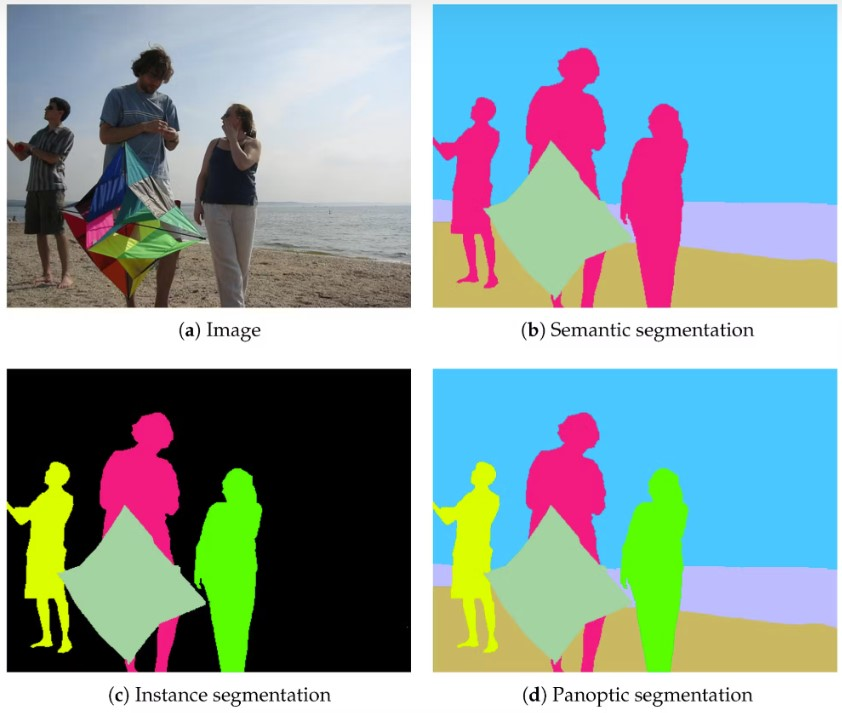

<i>Figure 8. Different types of segmentation tasks </i>

</center>

- **Semantic:** the simplest form of image segmentation where a label is assigned to every pixel based on its content 
    - Applications: geospatial surveys, retail inventory analysis
    - In the figure, we have given the same label to each instance of a person, as well as labelled the “stuff”. 
- **Instance:** the next step after semantic segmentation where individual instances of objects within the same class are distinguished. 
    - Applications: object counting, tracking, interaction analysis
    - Notice how we do not care about the “stuff” and only look at each instance of “things” (objects) 
- **Panoptic:** labels all pixels in an image, including both “stuff” (road, sky, grass) and “things” (people and animals). 
    - Applications: urban planning 
    - Essentially a combination of semantic and instance segmentation 

<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">

Classification of different physiological diseases is a key area that AI can be adopted to improve the efficiency of traditional medical imaging analysis; but in some cases, we may want to identify which regions of the patient exhibit damaged or cancerous tissue. In this example, we look at brain tumours and more specifically, how we can use segmentation to not only distinguish healthy tissue from cancerous tissue, but also where this cancerous tissue is localised. 

To emphasise the significance of this, radiotherapy is the common standard used to treat patients with cancer cells. This surgery involves directing high doses of radiation at the cancer cells, damaging their DNA in an attempt to kill or slow their growth. Clearly, this procedure needs to be heavily controlled to ensure you are directing the radiation only at the cancer cells and not killing your neural tissue, but "how do you know where they are in the first place?" Hopefully you understand why image segmentation is much more appropriate for this application. 

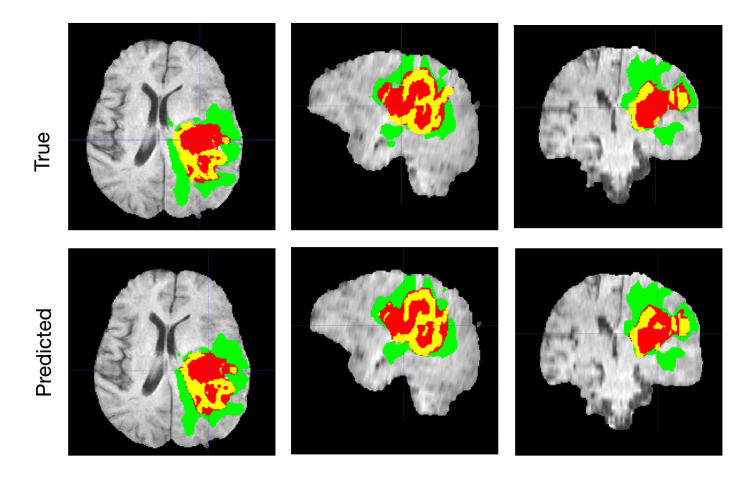

<h4><span style="color: #f28f2c;"> 5b. Datasets and DataLoaders </span></h4>

Now that we have a better understanding of brain tumours and segmentation tasks, our first step in training our neural network model is to actually obtain our data and prepare it for training, which is something we have introduced in the previous section on classification: 
- Sourcing the dataset for our brain tumour classification model and understanding its structure
- Splitting the dataset into training, validation, and test sets 
- Wrapping each dataset with a DataLoader to feed the data in batches rather than individual samples 

In the rest of this section on brain tumour segmentation, we will be referring to the following article on "Brain Tumour Image Segmentation Using Deep Networks" [4] where the authors discuss how they trained a neural network model on the BraTS-19 (Brain Tumour Segmentation 2019) challenge dataset to produce segmentation maps. 

<center>

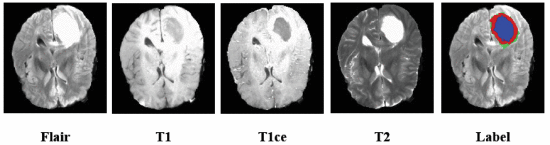

<i> Figure 9. BraTS-19 challenge dataset. </i>

</center>

<h4><span style="color: #f28f2c;"> 5c. Why and how are CNNs able to solve this kind of problem?  </span></h4>

In the end, the final neural network model produced in the article achieved relatively high dice scores (performance metric discussed in section 5d) in comparison to currently available state-of-the-art architectures, demonstrating the potential for automated segmentation to be more advantageous than current computer vision techniques and manual image analysis. This article also discusses how manually identifying brain tumour regions from MRI images is a task that is subjective in nature, time-consuming, and prone to variability. For example, since we are looking at image segmentation where we are interested in drawing boundaries around the tumours, the ability of the naked eye to determine clearly refined and accurate boundaries at high resolutions may pose inferior to machine learning. To address these issues, automated segmentation assists physicians by not only reducing the diagnosing and surgical planning periods, but also providing an "accurate, reproducible solution for further tumour analysis and monitoring" [4].

But what exactly did they change in their normal CNN architecture to transition from a neural network that produces class predictions to a neural network that produces segmentation maps? How did they improve the accuracy of their model to address the variability in shape, size, and appearance of the brain tumours?

For brain tumour segmentation tasks, ensembling is often employed where two or more networks are each selectively trained on the training set and their hyperparameters fine-tuned, improving the results and performance of the combined model. Each model will produce their own segmentation maps which are then combined to obtain the final prediction. In this example, the 3D CNN and 3D U-Net models were used:  

<center>

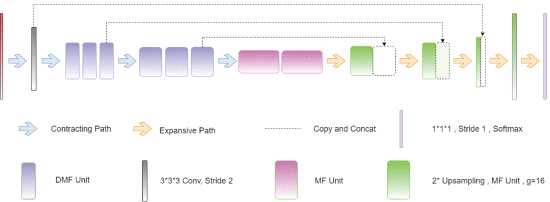

<i>Figure 10. 3D CNN structure.</i>

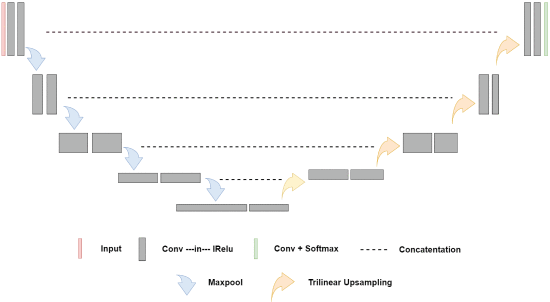

<i>Figure 11. 3D U-Net structure.</i>
</center>

We don't need you to remember any of the details of these two structures, however, we want you to understand that these two models were chosen due to their comparable results when fed with other existing datasets in the BraTS 2018 challenge (in simpler terms, "they are good models to use"). However, they didn't just stop there! Remember that these architectures are just generalised models. We want these models to be tailored to the task at hand and in this case, they decided to change a number of things:
- the training hyperparameters e.g., input size, batch size, learning rate, type of optimizer and loss function, etc.,
- the use of leaky ReLU instead of normal ReLU activation functions
- the use of instance normalisation instead of batch normalisation
- zero-padding to the MRI data to ensure the actual data could be fed into the network
- and so on...

After generating the individual segmentation maps of each network, ensembling the results by merely averaging the segmentation maps is not the most effective approach. Instead, these developers decided to employ <b>variability ensembling</b> where the segmentation maps of a specific model are chosen for any specific tumour region. With reference to figure 12 below:
- $N_1$ represents the 3D CNN whereas $N_2$ represents the 3D U-Net
- Each model is trained to produce their own segmentation maps for the 3 different tumour regions:
    - enhancing tumour (ET)
    - whole tumour (WT) and
    - tumour core (TC)
- After comparing the predictions to the actual results, it was observed that the 3D CNN was more accurate at segmenting the ET whilst the 3D U-Net was more accurate at segmenting the TC. Hence, these individual segmentation maps were taken from their respective models instead of taking from both models.  
- Both models contributed equally towards the output for the WT region

In other words, the three segmentation maps for the three brain tumour regions were chosen carefully and combined together to generate the final segmentation map/prediction $P_f$.

<center>

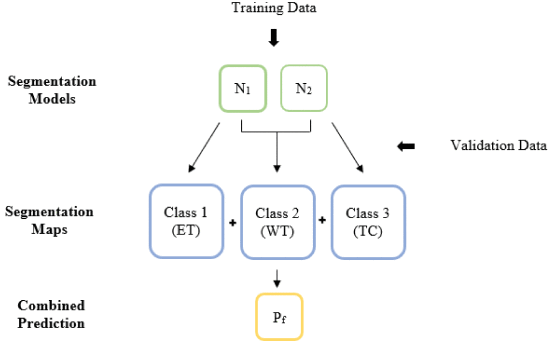

<i> Figure 12. Variability ensembling to generate the combined segmentation map. [4]. </i>

</center>

<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">


To summarise, the authors of this article were successful in producing a neural network model that was able to segment different regions of a brain tumour from MRI scans by following a certain procedure:  
- choosing two neural network models - 3D CNN and 3D U-Net - that were reputable for image segmentation
- training each network on the dataset to produce segmentation maps of the three different regions of the brain tumour (whole tumour, enhancing tumour, and tumour core)
- analysing the accuracy of each segmentation map and determining which model is accurate for a specific tumour region
- combining the three segmentation maps together to generate the combined prediction


<center>

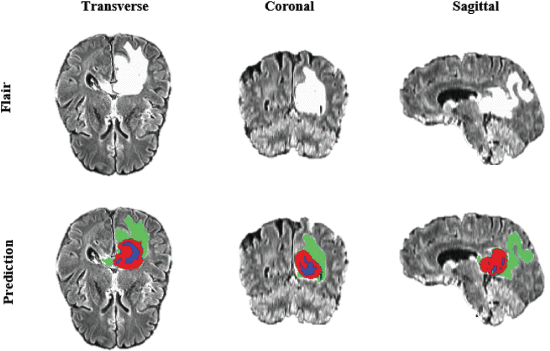

<i> Figure 13. Comparing the prediction of the brain tumour regions to the reference images. WT=green, TC=blue and red, ET=red. </i>

</center>

<h4><span style="color: #f28f2c;"> 5d. Analysing performance: dice metrics </span></h4>

<div style="background-color: #3995e6; color: white; padding: 10px; border-radius: 5px;">

To train and evaluate segmentation, we need a technique that is able to compare two masks. Enter the **Sorensen-Dice Coefficient**, commonly called the "dice score" or "dice metric". This score is used to quantify the similarity between sets. Given two sets, $X$ and $Y$, we can simply compute the score using the following equation:

$$D(X,Y)=\frac{2|X\cap Y|}{|X|+|Y|}$$


From a certain perspective, this is similar to how we use a confusion matrix to measure the similarity between sets. For a binary segmentation where there are only two classes, we are able to view $X$ as the true case, and $Y$ as the predicted mask. From this, we are able to compute the dice coefficient for any two masks as:

$$D(Y)=\frac{2\cdot\sum_{y_{true}\in Y_{true}, y_{pred}\in Y_{pred}}(y_{pred}\cdot y_{pred})}{\sum_{y_{true}\in Y_{true}}(y_{true})+\sum_{y_{pred}\In Y_{pred}}(y_{pred})}$$

$$D(Y)=\frac{2\cdot\sum_{y_{true}\cap Y_{true}, y_{pred}\cap Y_{pred}}(y_{pred}\cdot y_{pred})}{\sum_{y_{true}\cap Y_{true}}(y_{true})+\sum_{y_{pred}\cap Y_{pred}}(y_{pred})}$$


For more advanced problems, it is common to have multiple classes. In this circumstance, we can only calculate the dice coefficient for a single class; however, we would calculate the dice coefficient for individual masks by repeating the equation above for each $Y_i$ if our problem involved multiple classes. To compute this into a single value, we can find the mean score:
$$D_{net}=\frac{1}{C}\sum_{i=1}^CD(Y_i)$$

A dice score is able to provide us with an easy way to express how accurate a segmentation is, with it being the most common validation function within medical imaging. It is also commonly used as a training function.


<h2>References</h2>

1. “How to Detect Skin Cancer,” Roswell Park Comprehensive Cancer Center. https://www.roswellpark.org/cancertalk/201907/how-detect-skin-cancer
2. https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
3. https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7
4. https://ieeexplore.ieee.org/document/9171998

